In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("Trig_eff_homework.txt")

# Now we will filter to obtain the events triggered by Tr1, by Tr2 and by both triggers

In [3]:
#We are gonna get a list of vectors of the form p=(momenta, angle, triggered)
#We will use for triger one the muon+  and for the triger 2 the muon-

p1, p2 = [], []

t1, t2 = [], []

tr1, tr2 = [], []

for i in range(len(data[:,0])):
    
    if i%2==0:
        p1.append(data[i,0])
        t1.append(data[i,1])
        tr1.append(data[i,2])
    elif i%2!=0:
        p2.append(data[i,0])
        t2.append(data[i,1])
        tr2.append(data[i,2])

p2, p1 = np.array(p2), np.array(p1)
t2, t1 = np.array(t2), np.array(t1)
tr2, tr1 = np.array(tr2), np.array(tr1)

## Now we get the masks corresponding to triggering trigger 1, 2 or both

In [4]:
events_passing_trg1 = tr1==1
events_passing_trg2 = tr2==1

events_passing_trg1_trg2 = events_passing_trg1*events_passing_trg2


## Now we get the histograms of each set of events and the effciency

In [5]:
#Histogram for momentum

minP = 0
maxP = max(data[:,0])
nBins = 50
bins = np.linspace(minP, maxP, nBins)


counts_MuPlus_p, _ = np.histogram(p1, bins = bins)
counts_MuMinus_p, _ = np.histogram(p2, bins = bins)

counts_MuPlus_trg1_p, _ = np.histogram(p1[events_passing_trg1], bins = bins)
counts_MuPlus_trg2_p, _ = np.histogram(p1[events_passing_trg2], bins = bins)


tag_counts_muPlus_p, _ = np.histogram(p1[events_passing_trg2], bins = bins)

#pT of the first muon if the second one fired the trigger
tag_counts_muMinus_p, _ = np.histogram(p2[events_passing_trg1], bins = bins)


#pT of the second muon if the first one fired the trigger
probe_counts_muPlus_p, _ = np.histogram(p1[events_passing_trg1_trg2], bins = bins)

#pT of the first muon if the second one fired the trigger
probe_counts_Minus_p, _ = np.histogram(p2[events_passing_trg1_trg2], bins = bins)

eff_MC_p = (counts_MuPlus_trg1_p + counts_MuPlus_trg2_p)/(counts_MuPlus_p + counts_MuPlus_p)
eff_MC_uncertainty_p = np.sqrt(eff_MC_p*(1-eff_MC_p)/(counts_MuPlus_p + counts_MuPlus_p))

eff_TP_plus = (probe_counts_muPlus_p)/(tag_counts_muPlus_p)
eff_TP_minus = ( probe_counts_Minus_p)/(tag_counts_muMinus_p)

eff_TP_uncertainty_plus = np.sqrt(eff_TP_plus*(1-eff_TP_plus)/(tag_counts_muPlus_p))
eff_TP_uncertainty_minus = np.sqrt(eff_TP_minus*(1-eff_TP_minus)/(tag_counts_muMinus_p))

/tmp/ipykernel_16107/1115621748.py:28: RuntimeWarning: invalid value encountered in true_divide
  eff_MC_p = (counts_MuPlus_trg1_p + counts_MuPlus_trg2_p)/(counts_MuPlus_p + counts_MuPlus_p)
/tmp/ipykernel_16107/1115621748.py:31: RuntimeWarning: invalid value encountered in true_divide
  eff_TP_plus = (probe_counts_muPlus_p)/(tag_counts_muPlus_p)
/tmp/ipykernel_16107/1115621748.py:32: RuntimeWarning: invalid value encountered in true_divide
  eff_TP_minus = ( probe_counts_Minus_p)/(tag_counts_muMinus_p)


In [9]:
#Histogram for theta

minP = 0
maxP = max(data[:,1])
nBins = 20
bins_t = np.linspace(minP, maxP, nBins)


counts_MuPlus_t, _ = np.histogram(t1, bins = bins_t)
counts_MuMinus_t, _ = np.histogram(t2, bins = bins_t)

counts_MuPlus_trg1_t, _ = np.histogram(t1[events_passing_trg1], bins = bins_t)
counts_MuPlus_trg2_t, _ = np.histogram(t1[events_passing_trg2], bins = bins_t)


tag_counts_muPlus_t, _ = np.histogram(t1[events_passing_trg2], bins = bins_t)

#pT of the first muon if the second one fired the trigger
tag_counts_muMinus_t, _ = np.histogram(t2[events_passing_trg1], bins = bins_t)


#pT of the second muon if the first one fired the trigger
probe_counts_muPlus_t, _ = np.histogram(t1[events_passing_trg1_trg2], bins = bins_t)

#pT of the first muon if the second one fired the trigger
probe_counts_Minus_t, _ = np.histogram(t2[events_passing_trg1_trg2], bins = bins_t)

eff_MC_t = (counts_MuPlus_trg1_t + counts_MuPlus_trg2_t)/(counts_MuPlus_t + counts_MuPlus_t)
eff_MC_uncertainty_t = np.sqrt(eff_MC_t*(1-eff_MC_t)/(counts_MuPlus_t + counts_MuPlus_t))

eff_TP_t = (probe_counts_muPlus_t + probe_counts_Minus_t)/(tag_counts_muPlus_t + tag_counts_muMinus_t)
eff_TP_uncertainty_t = np.sqrt(eff_TP_t*(1-eff_TP_t)/(tag_counts_muPlus_t + tag_counts_muMinus_t))

/tmp/ipykernel_16107/1574255856.py:28: RuntimeWarning: invalid value encountered in true_divide
  eff_MC_t = (counts_MuPlus_trg1_t + counts_MuPlus_trg2_t)/(counts_MuPlus_t + counts_MuPlus_t)
/tmp/ipykernel_16107/1574255856.py:31: RuntimeWarning: invalid value encountered in true_divide
  eff_TP_t = (probe_counts_muPlus_t + probe_counts_Minus_t)/(tag_counts_muPlus_t + tag_counts_muMinus_t)


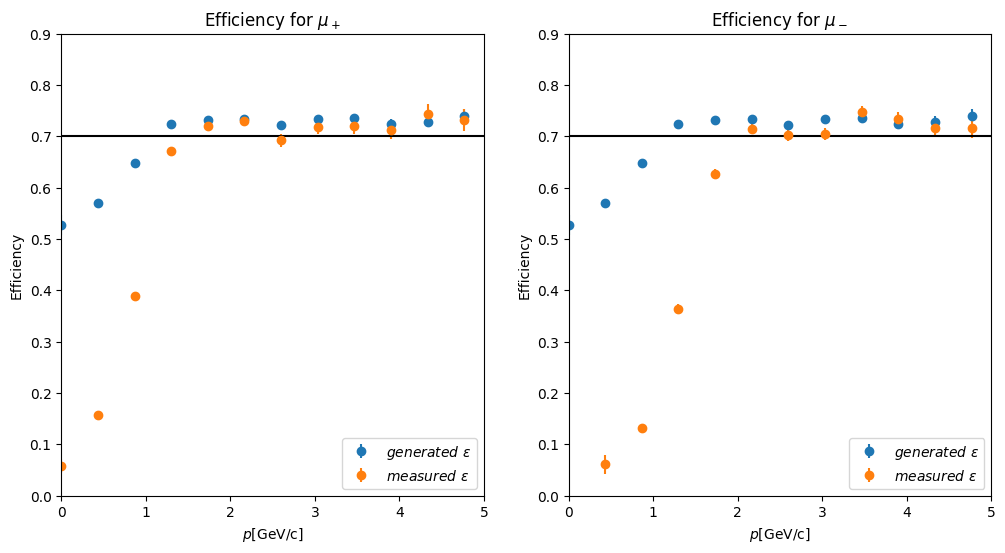

In [10]:
fig, axis = plt.subplots(1,2, figsize=(12, 6))

#plot the efficiency values at the middle of the momentum bins
x = bins[:-1] + (bins[1] - bins[0])/2.0

axis[0].errorbar(bins[:-1], eff_MC_p, yerr=eff_MC_uncertainty_p, fmt='o', label="$generated~\epsilon$")
axis[0].errorbar(bins[:-1], eff_TP_plus, yerr=eff_TP_uncertainty_plus, fmt="o", label="$measured~\epsilon$")

axis[0].plot([0,5], [0.7, 0.7], "black")
axis[0].set_xlim([0, 5])
axis[0].set_ylim([0, 0.9])
axis[0].set_xlabel(r"$p$[GeV/c]")
axis[0].set_title("Efficiency for $\mu_+$")
axis[0].set_ylabel("Efficiency")
axis[0].legend(loc="lower right");


axis[1].errorbar(bins[:-1], eff_MC_p, yerr=eff_MC_uncertainty_p, fmt='o', label="$generated~\epsilon$")
axis[1].errorbar(bins[:-1], eff_TP_minus, yerr=eff_TP_uncertainty_minus, fmt="o", label="$measured~\epsilon$")
axis[1].plot([0,5], [0.7, 0.7], "black")
axis[1].set_xlim([0, 5])
axis[1].set_ylim([0, 0.9])
axis[1].set_title("Efficiency for $\mu_-$")
axis[1].set_xlabel(r"$p$[GeV/c]")
axis[1].set_ylabel("Efficiency")
axis[1].legend(loc="lower right")
fig.savefig("momenta_efficiency.png")



## We can see at low p we have a drop on the efficiency so we can say that the trigger may be too high as we are not fully capturing this low momenta events

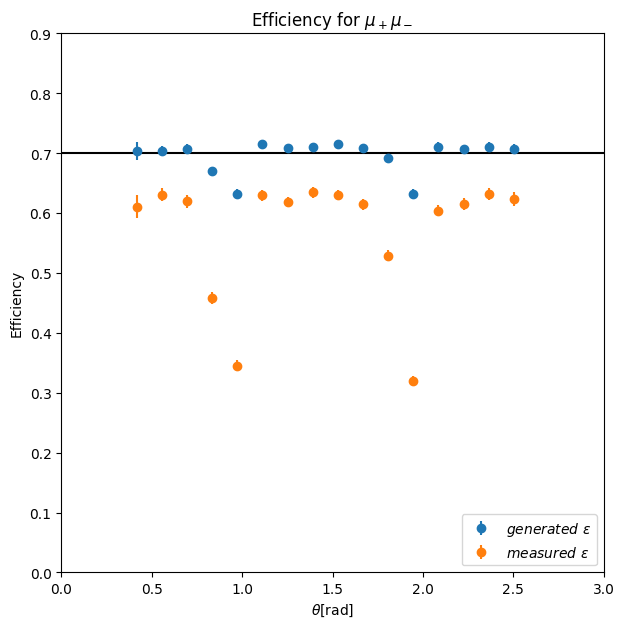

In [12]:
#Now the plot for the angle theta
fig, ax =plt.subplots(figsize=(7,7))
x_t = bins_t[:-1] + (bins_t[1] - bins_t[0])/2.0

ax.errorbar(bins_t[:-1], eff_MC_t, yerr=eff_MC_uncertainty_t, fmt='o', label="$generated~\epsilon$")
ax.errorbar(bins_t[:-1], eff_TP_t, yerr=eff_TP_uncertainty_t, fmt="o", label="$measured~\epsilon$")

ax.plot([0,5], [0.7, 0.7], "black")
ax.set_xlim([0, 3])
ax.set_ylim([0, 0.9])
ax.set_xlabel(r"$\theta$[rad]")
ax.set_ylabel("Efficiency")
ax.set_title("Efficiency for $\mu_+\mu_-$")
fig.savefig("theta.png")
ax.legend(loc="lower right");

## With the angle we can see  that the efficiency is constant, knowing that the lower momenta has lower efficiency, we can then extrapolate that there is not a prefered angle for this low p muons as we have constant angular efficiency


## we have some drops at 1 and 2 rad but also on the simulation so this may be caused by some configuration anomaly